In [44]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import numpy as np

In [62]:
seg_data = pandas.read_csv("segmentation_comparison3.txt")


In [63]:
seg_data.head()

,base_count,b,f,n,five_means_ce,five_means_pe,four_means_ce,four_means_pe,three_means_ce,three_means_pe,two_means_ce,two_means_pe,SCT_ce,SCT_pe
0,194,25,173,10,1,-334.820896,0.000000,0.000000,0.654639,-334.555970,1.000000,-334.820896,-2.943299,-159.429104
1,167,18,198,20,1,-534.714286,0.000000,0.000000,-20.622754,-495.482143,-19.383234,-499.226190,-2.580838,-263.726190
2,188,28,210,21,1,-282.018868,0.000000,-0.003145,-4.877660,-277.867925,-4.223404,-278.393082,-2.537234,-137.015723
3,163,37,107,14,1,-513.285714,-28.478528,-73.131429,1.000000,-513.285714,1.000000,-513.285714,-2.656442,-255.108571
4,185,49,225,6,1,-375.569038,0.000000,0.000000,1.000000,-375.569038,1.000000,-375.569038,-4.286486,-170.426778


In [64]:
seg_data["snr"] = (seg_data.f - seg_data.b)/seg_data.n

In [65]:
segm = pandas.melt(seg_data,id_vars=["base_count","b","f","n","snr"])

In [66]:
segm['Error Type'] = ["Foreground Pixel Count Error" if "pe" in x else "Object Count Error" for x in segm.variable.values ]
segm['Segmentation Method'] = [x[:-3] for x in segm.variable.values]
segm["Signal to Noise Ratio"] =segm.snr
segm["Error Rate"] = segm.value

In [67]:
segm["Absolute Fold Error"] = np.abs(segm.value)
segm["Fold Error"] = segm.value

In [68]:
segm.head()

,base_count,b,f,n,snr,variable,value,Error Type,Segmentation Method,Signal to Noise Ratio,Error Rate,Absolute Fold Error,Fold Error
0,194,25,173,10,14.800000,five_means_ce,1,Object Count Error,five_means,14.800000,1,1,1
1,167,18,198,20,9.000000,five_means_ce,1,Object Count Error,five_means,9.000000,1,1,1
2,188,28,210,21,8.666667,five_means_ce,1,Object Count Error,five_means,8.666667,1,1,1
3,163,37,107,14,5.000000,five_means_ce,1,Object Count Error,five_means,5.000000,1,1,1
4,185,49,225,6,29.333333,five_means_ce,1,Object Count Error,five_means,29.333333,1,1,1


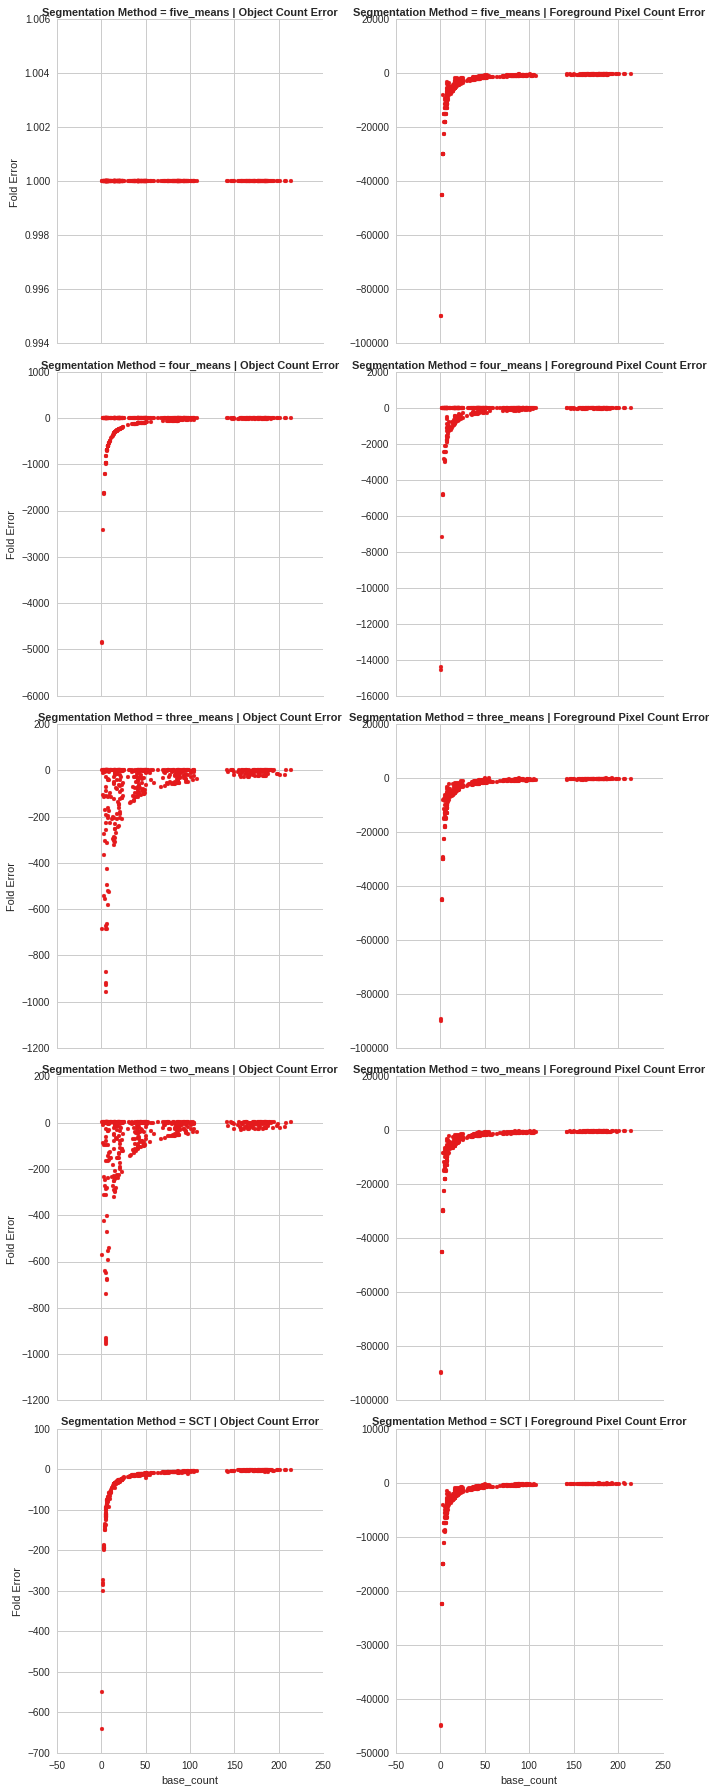

In [69]:
sns.set_style("whitegrid")
sns.set_palette("Set1",2)
grid = sns.FacetGrid(segm,col="Error Type", row="Segmentation Method", size=5,sharey=False)
grid.map(plt.scatter, "base_count", "Fold Error",s=15)
grid.set_titles(col_template="{col_name} ", fontweight='bold', fontsize=8)

In [72]:
five_means_sct = segm[(segm["Segmentation Method"]=="SCT")|(segm["Segmentation Method"]=="four_means")]

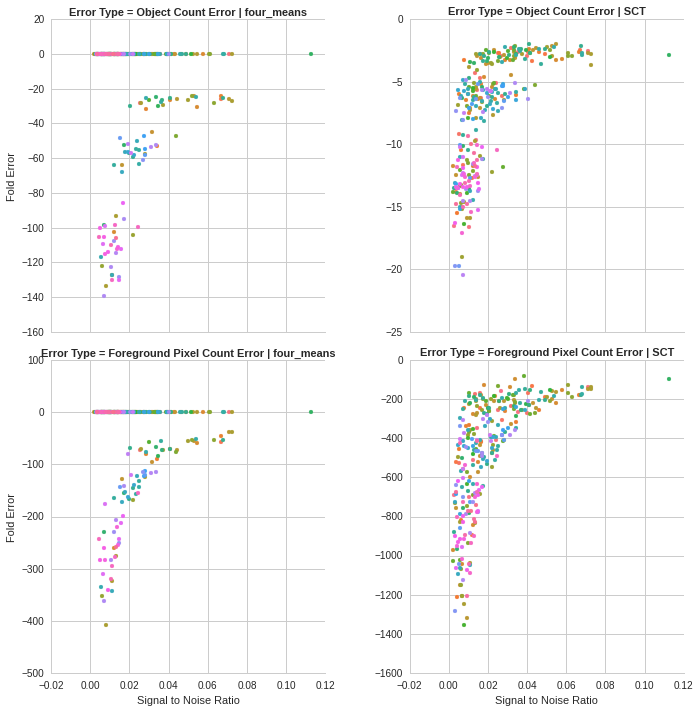

In [73]:
sns.set_style("whitegrid")
sns.set_palette("Set1",2)
grid = sns.FacetGrid(four_means_sct,row="Error Type", col="Segmentation Method",hue="base_count", size=5,sharey=False)
grid.map(plt.scatter, "Signal to Noise Ratio", "Fold Error",s=15)
grid.set_titles(col_template="{col_name} ", fontweight='bold', fontsize=8)